# Calculate enhancer、eRNA、EPI

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import os
import pyBigWig

In [2]:
# Fuction define. if eRNA intersect with promoter, return False. else return True
def ifFilter(row):
    try:
        if (row['eRNA_start'] >= row['promoter_start']) & (row['eRNA_start'] <= row['promoter_end']):
            return True
        elif (row['eRNA_end'] >= row['promoter_start']) & (row['eRNA_end'] <= row['promoter_end']):
            return True
        else:
            return False
    except:
        try:
            if (row['enhancer_start'] >= row['promoter_start']) & (row['enhancer_start'] <= row['promoter_end']):
                return True
            elif (row['enhancer_end'] >= row['promoter_start']) & (row['enhancer_end'] <= row['promoter_end']):
                return True
            else:
                return False
        except:
            raise KeyError

## enhancer identification

In [3]:
# # sequence data download
# cmd = f"bash download.sh"
# subprocess.run(cmd, shell=True)

In [5]:
# Align from original reads
cmd = f"bash align.sh 10 /home/limh/Reference_Genome/Danio_rerio/danRer10/BWA/danRer10.fa"
subprocess.run(cmd, shell=True)

2023-11-21 19:42:50,401 - SRR ids: ['ATAC_r1_pair.sra']
2023-11-21 19:42:50,401 - extra args: ['--gzip', '--split-3']
2023-11-21 19:42:50,516 - tempdir: /tmp/pfd_rla0a8ta
2023-11-21 19:42:50,516 - CMD: sra-stat --meta --quick ATAC_r1_pair.sra
2023-11-21 19:42:50,550 - ATAC_r1_pair.sra spots: 38189723
2023-11-21 19:42:50,550 - blocks: [[1, 3818972], [3818973, 7637944], [7637945, 11456916], [11456917, 15275888], [15275889, 19094860], [19094861, 22913832], [22913833, 26732804], [26732805, 30551776], [30551777, 34370748], [34370749, 38189723]]
2023-11-21 19:42:50,552 - CMD: fastq-dump -N 1 -X 3818972 -O /tmp/pfd_rla0a8ta/0 --gzip --split-3 ATAC_r1_pair.sra
2023-11-21 19:42:50,553 - CMD: fastq-dump -N 3818973 -X 7637944 -O /tmp/pfd_rla0a8ta/1 --gzip --split-3 ATAC_r1_pair.sra
2023-11-21 19:42:50,556 - CMD: fastq-dump -N 7637945 -X 11456916 -O /tmp/pfd_rla0a8ta/2 --gzip --split-3 ATAC_r1_pair.sra
2023-11-21 19:42:50,581 - CMD: fastq-dump -N 11456917 -X 15275888 -O /tmp/pfd_rla0a8ta/3 --gzip 

Read 3818972 spots for ATAC_r1_pair.sra
Written 3818972 spots for ATAC_r1_pair.sra
Read 3818972 spots for ATAC_r1_pair.sra
Written 3818972 spots for ATAC_r1_pair.sra
Read 3818975 spots for ATAC_r1_pair.sra
Written 3818975 spots for ATAC_r1_pair.sra
Read 3818972 spots for ATAC_r1_pair.sra
Written 3818972 spots for ATAC_r1_pair.sra
Read 3818972 spots for ATAC_r1_pair.sra
Written 3818972 spots for ATAC_r1_pair.sra
Read 3818972 spots for ATAC_r1_pair.sra
Written 3818972 spots for ATAC_r1_pair.sra
Read 3818972 spots for ATAC_r1_pair.sra
Written 3818972 spots for ATAC_r1_pair.sra
Read 3818972 spots for ATAC_r1_pair.sra
Written 3818972 spots for ATAC_r1_pair.sra
Read 3818972 spots for ATAC_r1_pair.sra
Written 3818972 spots for ATAC_r1_pair.sra
Read 3818972 spots for ATAC_r1_pair.sra
Written 3818972 spots for ATAC_r1_pair.sra


2023-11-21 19:47:27,873 - SRR ids: ['H3K27ac_r1_single.sra']
2023-11-21 19:47:27,873 - extra args: ['--gzip']
2023-11-21 19:47:27,903 - tempdir: /tmp/pfd_exxmys2y
2023-11-21 19:47:27,903 - CMD: sra-stat --meta --quick H3K27ac_r1_single.sra
2023-11-21 19:47:27,957 - H3K27ac_r1_single.sra spots: 11440822
2023-11-21 19:47:27,957 - blocks: [[1, 1144082], [1144083, 2288164], [2288165, 3432246], [3432247, 4576328], [4576329, 5720410], [5720411, 6864492], [6864493, 8008574], [8008575, 9152656], [9152657, 10296738], [10296739, 11440822]]
2023-11-21 19:47:27,958 - CMD: fastq-dump -N 1 -X 1144082 -O /tmp/pfd_exxmys2y/0 --gzip H3K27ac_r1_single.sra
2023-11-21 19:47:27,960 - CMD: fastq-dump -N 1144083 -X 2288164 -O /tmp/pfd_exxmys2y/1 --gzip H3K27ac_r1_single.sra
2023-11-21 19:47:27,962 - CMD: fastq-dump -N 2288165 -X 3432246 -O /tmp/pfd_exxmys2y/2 --gzip H3K27ac_r1_single.sra
2023-11-21 19:47:27,964 - CMD: fastq-dump -N 3432247 -X 4576328 -O /tmp/pfd_exxmys2y/3 --gzip H3K27ac_r1_single.sra
2023-1

Read 1144082 spots for H3K27ac_r1_single.sra
Written 1144082 spots for H3K27ac_r1_single.sra
Read 1144084 spots for H3K27ac_r1_single.sra
Written 1144084 spots for H3K27ac_r1_single.sra
Read 1144082 spots for H3K27ac_r1_single.sra
Written 1144082 spots for H3K27ac_r1_single.sra
Read 1144082 spots for H3K27ac_r1_single.sra
Written 1144082 spots for H3K27ac_r1_single.sra
Read 1144082 spots for H3K27ac_r1_single.sra
Written 1144082 spots for H3K27ac_r1_single.sra
Read 1144082 spots for H3K27ac_r1_single.sra
Written 1144082 spots for H3K27ac_r1_single.sra
Read 1144082 spots for H3K27ac_r1_single.sra
Written 1144082 spots for H3K27ac_r1_single.sra
Read 1144082 spots for H3K27ac_r1_single.sra
Written 1144082 spots for H3K27ac_r1_single.sra
Read 1144082 spots for H3K27ac_r1_single.sra
Written 1144082 spots for H3K27ac_r1_single.sra
Read 1144082 spots for H3K27ac_r1_single.sra
Written 1144082 spots for H3K27ac_r1_single.sra


2023-11-21 19:49:03,983 - SRR ids: ['H3K4me1_r1_single.sra']
2023-11-21 19:49:03,983 - extra args: ['--gzip']
2023-11-21 19:49:04,256 - tempdir: /tmp/pfd_p1hog9nb
2023-11-21 19:49:04,256 - CMD: sra-stat --meta --quick H3K4me1_r1_single.sra
2023-11-21 19:49:04,338 - H3K4me1_r1_single.sra spots: 20429006
2023-11-21 19:49:04,338 - blocks: [[1, 2042900], [2042901, 4085800], [4085801, 6128700], [6128701, 8171600], [8171601, 10214500], [10214501, 12257400], [12257401, 14300300], [14300301, 16343200], [16343201, 18386100], [18386101, 20429006]]
2023-11-21 19:49:04,339 - CMD: fastq-dump -N 1 -X 2042900 -O /tmp/pfd_p1hog9nb/0 --gzip H3K4me1_r1_single.sra
2023-11-21 19:49:04,341 - CMD: fastq-dump -N 2042901 -X 4085800 -O /tmp/pfd_p1hog9nb/1 --gzip H3K4me1_r1_single.sra
2023-11-21 19:49:04,343 - CMD: fastq-dump -N 4085801 -X 6128700 -O /tmp/pfd_p1hog9nb/2 --gzip H3K4me1_r1_single.sra
2023-11-21 19:49:04,345 - CMD: fastq-dump -N 6128701 -X 8171600 -O /tmp/pfd_p1hog9nb/3 --gzip H3K4me1_r1_single.sr

Read 2042900 spots for H3K4me1_r1_single.sra
Written 2042900 spots for H3K4me1_r1_single.sra
Read 2042900 spots for H3K4me1_r1_single.sra
Written 2042900 spots for H3K4me1_r1_single.sra
Read 2042900 spots for H3K4me1_r1_single.sra
Written 2042900 spots for H3K4me1_r1_single.sra
Read 2042900 spots for H3K4me1_r1_single.sra
Written 2042900 spots for H3K4me1_r1_single.sra
Read 2042900 spots for H3K4me1_r1_single.sra
Written 2042900 spots for H3K4me1_r1_single.sra
Read 2042900 spots for H3K4me1_r1_single.sra
Written 2042900 spots for H3K4me1_r1_single.sra
Read 2042900 spots for H3K4me1_r1_single.sra
Written 2042900 spots for H3K4me1_r1_single.sra
Read 2042900 spots for H3K4me1_r1_single.sra
Written 2042900 spots for H3K4me1_r1_single.sra
Read 2042900 spots for H3K4me1_r1_single.sra
Written 2042900 spots for H3K4me1_r1_single.sra
Read 2042906 spots for H3K4me1_r1_single.sra
Written 2042906 spots for H3K4me1_r1_single.sra


2023-11-21 19:50:36,149 - SRR ids: ['H3K4me3_r1_single.sra']
2023-11-21 19:50:36,149 - extra args: ['--gzip']
2023-11-21 19:50:36,298 - tempdir: /tmp/pfd_x3nuwx2c
2023-11-21 19:50:36,299 - CMD: sra-stat --meta --quick H3K4me3_r1_single.sra
2023-11-21 19:50:36,358 - H3K4me3_r1_single.sra spots: 24215389
2023-11-21 19:50:36,358 - blocks: [[1, 2421538], [2421539, 4843076], [4843077, 7264614], [7264615, 9686152], [9686153, 12107690], [12107691, 14529228], [14529229, 16950766], [16950767, 19372304], [19372305, 21793842], [21793843, 24215389]]
2023-11-21 19:50:36,360 - CMD: fastq-dump -N 1 -X 2421538 -O /tmp/pfd_x3nuwx2c/0 --gzip H3K4me3_r1_single.sra
2023-11-21 19:50:36,362 - CMD: fastq-dump -N 2421539 -X 4843076 -O /tmp/pfd_x3nuwx2c/1 --gzip H3K4me3_r1_single.sra
2023-11-21 19:50:36,363 - CMD: fastq-dump -N 4843077 -X 7264614 -O /tmp/pfd_x3nuwx2c/2 --gzip H3K4me3_r1_single.sra
2023-11-21 19:50:36,365 - CMD: fastq-dump -N 7264615 -X 9686152 -O /tmp/pfd_x3nuwx2c/3 --gzip H3K4me3_r1_single.sr

Read 2421538 spots for H3K4me3_r1_single.sra
Written 2421538 spots for H3K4me3_r1_single.sra
Read 2421538 spots for H3K4me3_r1_single.sra
Written 2421538 spots for H3K4me3_r1_single.sra
Read 2421538 spots for H3K4me3_r1_single.sra
Written 2421538 spots for H3K4me3_r1_single.sra
Read 2421538 spots for H3K4me3_r1_single.sra
Written 2421538 spots for H3K4me3_r1_single.sra
Read 2421538 spots for H3K4me3_r1_single.sra
Written 2421538 spots for H3K4me3_r1_single.sra
Read 2421547 spots for H3K4me3_r1_single.sra
Written 2421547 spots for H3K4me3_r1_single.sra
Read 2421538 spots for H3K4me3_r1_single.sra
Written 2421538 spots for H3K4me3_r1_single.sra
Read 2421538 spots for H3K4me3_r1_single.sra
Written 2421538 spots for H3K4me3_r1_single.sra
Read 2421538 spots for H3K4me3_r1_single.sra
Written 2421538 spots for H3K4me3_r1_single.sra
Read 2421538 spots for H3K4me3_r1_single.sra
Written 2421538 spots for H3K4me3_r1_single.sra


Path to Cutadapt set as: 'cutadapt' (default)
Cutadapt seems to be working fine (tested command 'cutadapt --version')
Cutadapt version: 4.4
Cutadapt seems to be using Python 3! Proceeding with multi-core enabled Cutadapt using 2 cores
Proceeding with 'gzip' for compression. PLEASE NOTE: Using multi-cores for trimming with 'gzip' only has only very limited effect! (see here: https://github.com/FelixKrueger/TrimGalore/issues/16#issuecomment-458557103)
To increase performance, please install 'pigz' and run again

Output will be written into the directory: /home/limh/lmh_project_code/1EPI_construction/danRer10/whole_embryo_24hpf/


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> ATAC_r1_pair_1.fastq.gz <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentage
Nextera	92990	CTGTCTCTTATA	1000000	9.30
Illumina	1	AGATCGGAAGAGC	1000000	0.00
smallRNA	1	TGGAA

CompletedProcess(args='bash align.sh 10 /home/limh/Reference_Genome/Danio_rerio/danRer10/BWA/danRer10.fa', returncode=0)

In [18]:
# Histone modification ChIP-seq call peak
files = ['H3K27ac_r1_sort_rmdup.bam', 'H3K4me1_r1_sort_rmdup.bam']
for file in files:
    inputFile = 'input_r1_sort_rmdup.bam' if 'r1' in file else 'input_r2_sort_rmdup.bam'
    cmd = f"sicer -t {file} -s danRer10 -fdr 0.05 -cpu 20 -o ."
    subprocess.run(cmd, shell=True)
    
# Get standard-format broadPeak file from sicer result
files = [x for x in os.listdir() if (x.endswith('-W200-G600.scoreisland') and 'H3K' in x)]
for file in files:
    df = pd.read_csv(file, sep='\t', header=None)
    df.insert(3, 'peakName', [f'peak{x}' for x in range(1, df.shape[0]+1)])
    df['strand'] = '.'
    df['signalValue'] = df[3]
    df['pValue'] = df[3]
    df['qValue'] = df[3]
    df.to_csv(file.replace('-W200-G600.scoreisland', '.broadPeak'), sep='\t', header=None, index=False)
    

# H3K4me1 H3K27ac intersection calculation
H3K4me1_file = [x for x in os.listdir() if (x.endswith('.broadPeak') and 'H3K4me1' in x)][0]
H3K27ac_file = [x for x in os.listdir() if (x.endswith('.broadPeak') and 'H3K27ac' in x)][0]
cmd = f"bedtools intersect -a {H3K4me1_file} -b {H3K27ac_file} > H3K4me1_H3K27ac_intersect.bed"
subprocess.run(cmd, shell=True)

# Retain H3K4me1 H3K27ac intersection part which show lower H3K4me3 histone modification signal. Get primary enhancer.
H3K4me1_bam = [x for x in os.listdir() if (x.endswith('rmdup.bam') and 'H3K4me1' in x)]
for file in H3K4me1_bam:
    if f"{file}.bai" in os.listdir():
        continue
    cmd = f"samtools index -@ 20 {file}"
    subprocess.run(cmd, shell=True)
cmd = f'''bamCompare -b1 {H3K4me1_bam[0]} -b2 {H3K4me1_bam[0]} --outFileName H3K4me1_all.bw \
          --normalizeUsing CPM --binSize 10 --operation add --numberOfProcessors 20 --scaleFactorsMethod None'''
subprocess.run(cmd, shell=True)
H3K4me3_bam = [x for x in os.listdir() if (x.endswith('rmdup.bam') and 'H3K4me3' in x)]
for file in H3K4me3_bam:
    if f"{file}.bai" in os.listdir():
        continue
    cmd = f"samtools index -@ 20 {file}"
    subprocess.run(cmd, shell=True)
cmd = f'''bamCompare -b1 {H3K4me3_bam[0]} -b2 {H3K4me3_bam[0]} --outFileName H3K4me3_all.bw \
            --normalizeUsing CPM --binSize 10 --operation add --numberOfProcessors 20 --scaleFactorsMethod None'''
subprocess.run(cmd, shell=True)
me1BW = pyBigWig.open('H3K4me1_all.bw')
me3BW = pyBigWig.open('H3K4me3_all.bw')
def ifRetain(row, me1BW, me3BW, me1ScoreAll=1, me3ScoreAll=1):
    chr = row[0]
    start = row[1]
    end = row[2]
    me1Score = np.array(me1BW.stats(chr, start, end, type='sum'))[0] / me1ScoreAll * pow(10, 6)
    me3Score = np.array(me3BW.stats(chr, start, end, type='sum'))[0] / me3ScoreAll * pow(10, 6)
    if me1Score > 1.5 * me3Score:
        return True, me1Score, me3Score
    else:
        return False, me1Score, me3Score
df = pd.read_csv('H3K4me1_H3K27ac_intersect.bed', sep='\t', header=None)
df['result'] = df.apply(ifRetain, axis=1, args=(me1BW, me3BW))
df[['retain', 'me1Score', 'me3Score']] = df['result'].apply(pd.Series)
me1BW.close()
me3BW.close()
df[df['retain']][[0,1,2]].to_csv('enhancer_primary.bed', sep='\t', header=None, index=False)

# ATAC-seq data process to get broadPeak.
files = [x for x in os.listdir() if ((x.endswith('rmdup.bam')) and ('ATAC' in x))]
for file in files:
    cmd = f"sicer -t {file} -s danRer10 -fdr 0.05 -cpu 20 -o ."
    subprocess.run(cmd, shell=True)
files = [x for x in os.listdir() if (x.endswith('-W200-G600.scoreisland') and 'ATAC' in x)]
for file in files:
    df = pd.read_csv(file, sep='\t', header=None)
    df.insert(3, 'peakName', [f'peak{x}' for x in range(1, df.shape[0]+1)])
    df['strand'] = '.'
    df['signalValue'] = df[3]
    df['pValue'] = df[3]
    df['qValue'] = df[3]
    df.to_csv(file.replace('-W200-G600.scoreisland', '.broadPeak'), sep='\t', header=None, index=False)
    
# Use idr to combine different replicates
files = [x for x in os.listdir() if (x.endswith('.broadPeak') and 'ATAC' in x and 'r1' in x)]
for file in files:
    file_rep2 = file.replace('r1', 'r2')
    outfile = file.replace('r1',  'idr')
    cmd = f'''idr --samples {file} {file_rep2} --input-file-type broadPeak \
        --rank q.value --output-file {outfile} --output-file-type broadPeak \
            --plot --log-output-file {outfile}.log'''
    subprocess.run(cmd, shell=True)
    
# Filter idr result with threshold as 0.1
files = [x for x in os.listdir() if (x.endswith('.broadPeak') and 'ATAC' in x and 'idr' in x)]
for file in files:
    df = pd.read_csv(file, sep='\t', header=None)
    df = df[df[4]> int(-125 *  np.log2(0.1))]
    df.to_csv(file.replace('.broadPeak', '_filter.broadPeak'), sep='\t', header=None, index=False)

# Filter primary enhancer with its DNase broadPeak. Obtain final enhancer.
DNase_file = [x for x in os.listdir() if (x.endswith('.broadPeak') and 'ATAC' in x and 'idr' in x)][0]
cmd = f"bedtools intersect -a enhancer_primary.bed -b {DNase_file} -u -f 0.5 -F 0.5 -e > enhancer.bed"
subprocess.run(cmd, shell=True)

Running SICER with given arguments 

Preprocess the ATAC_r2_sort_rmdup.bed file to remove redundancy with threshold of 1 

---------------------------------------------------------------------------------------------------------
chrom    Total plus reads        Retained plus reads       Total minus reads      Retained minus reads   
---------------------------------------------------------------------------------------------------------
chr4          1149917                  1092501                  1153719                  1092574         
chr7          1903730                  1793047                  1909450                  1793617         
chr5          1843955                  1738932                  1849253                  1739821         
chr3          1562501                  1468418                  1567575                  1469242         
chr6          1526584                  1445678                  1531156                  1446016         
chr2          1486128        

CompletedProcess(args='bedtools intersect -a enhancer_primary.bed -b ATAC_r2_sort_rmdup.broadPeak -u -f 0.5 -F 0.5 -e > enhancer.bed', returncode=0)

In [19]:
# process enhancer file
df = pd.read_csv('enhancer.bed', sep='\t', header=None)
df[3] = [f"enhancer{i}" for i in range(df.shape[0])]
df[4] = 1
df[5] = '.'
df.to_csv('enhancer.bg', sep='\t', header=None, index=None)

## enhancer promoter interaction construction

In [28]:
# # Use arrowhead to get TAD        
# cmd = f"juicer_tools arrowhead GSE156097_HiC_24h_wt_comb.hic -k KR ./arrowhead"
# subprocess.run(cmd, shell=True)

# get TAD bed file
df = pd.read_csv('arrowhead/10000_blocks.bedpe', sep='\t', header=None, skiprows=2)
df[0] = df[0]
df[[0,1,2]].to_csv('TAD.bed', sep='\t', header=None, index=None)

# Sort TAD, the result is: TAD_sort.bed
cmd = f"bedtools sort -i TAD.bed > TAD_sort.bed"
subprocess.run(cmd, shell=True)

CompletedProcess(args='bedtools sort -i TAD.bed > TAD_sort.bed', returncode=0)

In [29]:
# Filter TAD, the result is: TAD_filter_sort.bed
def ifIntersect(x:tuple, y:tuple, f=0., F=0.)->bool:
    '''If two section overlap'''
    if int(x[0])<int(y[0])<int(x[1]):
        if int(y[1])<int(x[1]):
            return 1
        else:
            if int(x[1])-int(y[0]) / int(x[1])-int(x[0]) > f or int(x[1])-int(y[0]) / int(y[1])-int(y[0]) > F:
                return 1
            else:
                return 0
    elif int(y[0])<int(x[0])<int(y[1]):
        if int(y[1]) > int(x[1]):
            return 1
        else:
            if int(y[1])-int(x[0]) / int(x[1])-int(x[0]) > f or int(y[1])-int(x[0]) / int(y[1])-int(y[0]) > F:
                return 1
            else:
                return 0
    return 0

from collections import defaultdict as ddict
tadInterval = ddict(list)
with open('TAD_sort.bed', 'r') as infile:
    for line in infile:
        if len(tadInterval[line.split()[0]]) == 0:
            tadInterval[line.split()[0]].append((int(line.split()[1]), int(line.split()[2])))
        else:
            tadInter = (int(line.split()[1]), int(line.split()[2]))
            if ifIntersect(tadInterval[line.split()[0]][-1], tadInter):
                lengthOld = tadInterval[line.split()[0]][-1][1] - tadInterval[line.split()[0]][-1][0]
                lengthNew = tadInter[1] - tadInter[0]
                if lengthNew > lengthOld:
                    tadInterval[line.split()[0]].remove(tadInterval[line.split()[0]][-1])
                    tadInterval[line.split()[0]].append(tadInter)
            else:
                tadInterval[line.split()[0]].append(tadInter)
outfile = open('TAD_filter.bed', 'w')
for chromosome in tadInterval.keys():
    for i in tadInterval[chromosome]:
        print(f'{chromosome}\t{i[0]}\t{i[1]}', file=outfile)
outfile.close()
!bedtools sort -i TAD_filter.bed > TAD_filter_sort.bed

In [30]:
# build enhancer promoter interaction
cmd = f"bedtools intersect -a enhancer.bg -b TAD_filter_sort.bed -wo -f 0.8 -F 0.8 -e > enhancer_TAD_intersectWo.txt"
subprocess.run(cmd, shell=True)
cmd = f"bedtools intersect -a promoter.bed -b TAD_filter_sort.bed -wo -f 0.8 -F 0.8  -e > promoter_TAD_intersectWo.txt"
subprocess.run(cmd, shell=True)

promoter_TAD_intersectWo_df = pd.read_csv('promoter_TAD_intersectWo.txt', sep='\t', header=None)
promoter_TAD_intersectWo_df.columns = ['promoter_chr', 'promoter_start', 'promoter_end', 'promoter_name', 'promoter_score', 'promoter_strand',
                                       'TAD_chr', 'TAD_start', 'TAD_end', 'intersect']
eRNA_TAD_intersectWo_df = pd.read_csv('enhancer_TAD_intersectWo.txt', sep='\t', header=None)
eRNA_TAD_intersectWo_df.columns = ['eRNA_chr', 'eRNA_start', 'eRNA_end', 'eRNA_name', 'eRNA_score', 'eRNA_strand',
                                   'TAD_chr', 'TAD_start', 'TAD_end', 'intersect']
epi_df = pd.merge(eRNA_TAD_intersectWo_df, promoter_TAD_intersectWo_df,
                  on = ['TAD_chr', 'TAD_start', 'TAD_end'], how='inner')

# EPI filter
epi_df['filter'] = epi_df.apply(ifFilter, axis=1)
epi_filter_df = epi_df[epi_df['filter']==False]
epi_filter_df['epi_name'] = epi_filter_df['eRNA_name'].str.cat(epi_filter_df['promoter_name'], sep=';')

# EPI result save
epi_filter_df[['eRNA_chr', 'eRNA_start', 'eRNA_end', 'promoter_chr', 'promoter_start', 'promoter_end',
               'epi_name', 'eRNA_score', 'eRNA_strand', 'promoter_strand']].to_csv('EPI.bedpe', sep='\t', header=None, index=None)

/home/limh/miniconda3/envs/chipseq/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# EP similarity analysis

In [31]:
import pandas as pd
import subprocess
import os
import numpy as np
import pyBigWig
pd.set_option('display.max_columns', None)
import pickle

In [32]:
# get enhancer、promoter from EPI
referenceGenome = '/home/limh/Reference_Genome/Danio_rerio/danRer10/danRer10.fa'
epi_df = pd.read_csv('EPI.bedpe', sep='\t', header=None)
epi_df[['eRNA_name', 'promoter_name']] = epi_df[6].str.split(';', expand=True)
epi_df[[0, 1, 2, 'eRNA_name', 7, 8]].drop_duplicates('eRNA_name').to_csv('enhancer_inEPI.bed', sep='\t', header=None, index=None)
epi_df[[3, 4, 5, 'promoter_name', 7, 9]].drop_duplicates('promoter_name').to_csv('promoter_inEPI.bed', sep='\t', header=None, index=None)

# Get fasta of eRNAinEPI,promoterInEPI
cmd = f"bedtools getfasta -fi {referenceGenome} -fo enhancer_inEPI.fa -name -bed enhancer_inEPI.bed -s"
subprocess.run(cmd, shell=True)
cmd = f"bedtools getfasta -fi {referenceGenome} -fo promoter_inEPI.fa -name -bed promoter_inEPI.bed -s"
subprocess.run(cmd, shell=True)

# Split fasta
os.makedirs('EPI_fasta', exist_ok=True)
with open('enhancer_inEPI.fa', 'r') as f:
	for line in f:
		if line.startswith('>'):
			name = line.strip().split('::')[0][1:]
			out = open(f"EPI_fasta/{name}.fa", 'w')
			# out.write(f">{name}\n")
			# out.write(line)
			print('>' + line.strip().split('::')[1], file=out)
		else:
			out.write(line)
	out.close()
with open('promoter_inEPI.fa', 'r') as f:
	for line in f:
		if line.startswith('>'):
			name = line.strip().split('::')[0][1:]
			out = open(f"EPI_fasta/{name}.fa", 'w')
			# out.write(f">{name}\n")
			# out.write(line)
			print('>' + line.strip().split('::')[1], file=out)
		else:
			out.write(line)
	out.close()

index file /home/limh/Reference_Genome/Danio_rerio/danRer10/danRer10.fa.fai not found, generating...


In [33]:
# enhancer
# makeblastdb script
genes = [x for x in os.listdir('EPI_fasta') if (x.endswith('.fa') and not x.startswith('enhancer'))]
makedf_bash_file = open('EPI_makedb.sh', 'w')
if os.path.exists('EPI_makedb.log'):
    os.remove('EPI_makedb.log')
for gene in enumerate(genes):
    print(f"makeblastdb -in EPI_fasta/{gene[1]} -dbtype nucl >> EPI_makedb.log", file=makedf_bash_file)
makedf_bash_file.close()

# blast script
epi_list = epi_df[['eRNA_name', 'promoter_name']].values.tolist()
blast_bash_file = open('EPI_blast.sh', 'w')
if os.path.exists('EPI_blastResult.txt'):
    os.remove('EPI_blastResult.txt')
for i in epi_list:
    eRNA = i[0]
    promoter = i[1]
    print(f"blastn -task blastn -query EPI_fasta/{eRNA}.fa -db EPI_fasta/{promoter}.fa -outfmt 6 -evalue 1e-4 >> EPI_blastResult.txt", file=blast_bash_file)
blast_bash_file.close()

In [ ]:
import subprocess
subprocess.run('bash EPI_makedb.sh', shell=True)
subprocess.run('bash EPI_blast.sh', shell=True)

In [35]:
# Get the sequence similar enhancer in EPI
blastResultFile = 'EPI_blastResult.txt'
blastResultBedFile = 'EPI_enhancerBlastHit.bed'
with open(blastResultFile, 'r') as infile, open(blastResultBedFile, 'w') as outfile:
	for line in infile:
		chromosome = line.split()[0].split(':')[0]
		startPre = int(line.split()[0].split(':')[1].split('-')[0])
		stopPre = int(line.split()[0].split(':')[1].split('-')[1].split('(')[0])
		name = line.split()[0]
		otherName = line.split()[1]
		strand = line.split()[0].split(':')[1].split('(')[1][0]
		if strand == '+' or strand == '.':
			if int(line.split()[6]) < int(line.split()[7]):
				shiftStart = int(line.split()[6])
				shiftEnd = int(line.split()[7])
			elif int(line.split()[6]) > int(line.split()[7]):
				shiftStart = int(line.split()[7])
				shiftEnd = int(line.split()[6])
			start = startPre + shiftStart - 1
			end = startPre + shiftEnd - 1
		elif strand == '-':
			if int(line.split()[6]) < int(line.split()[7]):
				shiftStart = int(line.split()[6])
				shiftEnd = int(line.split()[7])
			elif int(line.split()[6]) > int(line.split()[7]):
				shiftStart = int(line.split()[7])
				shiftEnd = int(line.split()[6])
			end = stopPre - shiftStart
			start = stopPre - shiftEnd
		print(f'{chromosome}\t{start}\t{end}\t{name}\t{otherName}\t{strand}', file=outfile)
        
# Get the sequence similar promoter in EPI
blastResultFile = 'EPI_blastResult.txt'
blastResultBedFile = 'EPI_promoterBlastHit.bed'
with open(blastResultFile, 'r') as infile, open(blastResultBedFile, 'w') as outfile:
	for line in infile:
		chromosome = line.split()[1].split(':')[0]
		startPre = int(line.split()[1].split(':')[1].split('-')[0])
		stopPre = int(line.split()[1].split(':')[1].split('-')[1].split('(')[0])
		name = line.split()[1]
		otherName = line.split()[0]
		strand = line.split()[1].split(':')[1].split('(')[1][0]
		if strand == '+' or strand == '.':
			if int(line.split()[8]) < int(line.split()[9]):
				shiftStart = int(line.split()[8])
				shiftEnd = int(line.split()[9])
			elif int(line.split()[8]) > int(line.split()[9]):
				shiftStart = int(line.split()[9])
				shiftEnd = int(line.split()[8])
			start = startPre + shiftStart - 1
			end = startPre + shiftEnd - 1
		elif strand == '-':
			if int(line.split()[8]) < int(line.split()[9]):
				shiftStart = int(line.split()[8])
				shiftEnd = int(line.split()[9])
			elif int(line.split()[8]) > int(line.split()[9]):
				shiftStart = int(line.split()[9])
				shiftEnd = int(line.split()[8])
			end = stopPre - shiftStart
			start = stopPre - shiftEnd
		print(f'{chromosome}\t{start}\t{end}\t{name}\t{otherName}\t{strand}', file=outfile)

In [39]:
# Get out the TE similar EPI, save as ep_same_{te}.bedpe
promoter_blast_df = pd.read_csv('EPI_promoterBlastHit.bed', sep='\t', header=None)
enhancer_blast_df = pd.read_csv('EPI_enhancerBlastHit.bed', sep='\t', header=None)
promoter_blast_df.columns = ['promoter_blastHit_chr', 'promoter_blastHit_start', 'promoter_blastHit_end', 'promoter', 'eRNA', 'promoter_strand']
enhancer_blast_df.columns = ['eRNA_blastHit_chr', 'eRNA_blastHit_start', 'eRNA_blastHit_end', 'eRNA', 'promoter', 'eRNA_strand']
epi_df = pd.read_csv('EPI.bedpe', sep='\t', header=None)
epi_df.columns = ['eRNA_chr', 'eRNA_start', 'eRNA_end', 'promoter_chr', 'promoter_start', 'promoter_end',
               'epi_name', 'eRNA_score', 'eRNA_strand', 'promoter_strand']
promoter_blast_df['promoter_chr'] = promoter_blast_df['promoter'].str.split(':').str[0]
promoter_blast_df['promoter_start'] = promoter_blast_df['promoter'].str.split(':').str[1].str.split('-').str[0].str.split('(').str[0].astype(int)
promoter_blast_df['promoter_end'] = promoter_blast_df['promoter'].str.split(':').str[1].str.split('-').str[1].str.split('(').str[0].astype(int)
promoter_blast_df['eRNA_chr'] = promoter_blast_df['eRNA'].str.split(':').str[0]
promoter_blast_df['eRNA_start'] = promoter_blast_df['eRNA'].str.split(':').str[1].str.split('-').str[0].str.split('(').str[0].astype(int)
promoter_blast_df['eRNA_end'] = promoter_blast_df['eRNA'].str.split(':').str[1].str.split('-').str[1].str.split('(').str[0].astype(int)

enhancer_blast_df['eRNA_chr'] = enhancer_blast_df['eRNA'].str.split(':').str[0]
enhancer_blast_df['eRNA_start'] = enhancer_blast_df['eRNA'].str.split(':').str[1].str.split('-').str[0].str.split('(').str[0].astype(int)
enhancer_blast_df['eRNA_end'] = enhancer_blast_df['eRNA'].str.split(':').str[1].str.split('-').str[1].str.split('(').str[0].astype(int)
enhancer_blast_df['promoter_chr'] = enhancer_blast_df['promoter'].str.split(':').str[0]
enhancer_blast_df['promoter_start'] = enhancer_blast_df['promoter'].str.split(':').str[1].str.split('-').str[0].str.split('(').str[0].astype(int)
enhancer_blast_df['promoter_end'] = enhancer_blast_df['promoter'].str.split(':').str[1].str.split('-').str[1].str.split('(').str[0].astype(int)

# Get out the intersection between transposon and blastHit
transposonFile = 'danRer10.fa.bed'
x = pd.merge(epi_df, promoter_blast_df, on=['eRNA_chr', 'eRNA_start', 'eRNA_end', 'promoter_chr', 
                                            'promoter_start', 'promoter_end', 'promoter_strand'], how='inner')
y = pd.merge(x, enhancer_blast_df, on=['eRNA_chr', 'eRNA_start', 'eRNA_end', 'promoter_chr', 
                                       'promoter_start', 'promoter_end', 'promoter', 'eRNA', 'eRNA_strand'
                                       ], how='inner')
cmd = f"bedtools intersect -a EPI_promoterBlastHit.bed -b {transposonFile} -wo -f 0.8 -F 0.8 -e > EPI_promoterBlastHit_transposon_intersectWo.bed"
subprocess.run(cmd, shell=True)
cmd = f"bedtools intersect -a EPI_enhancerBlastHit.bed -b {transposonFile} -wo -f 0.8 -F 0.8 -e > EPI_enhancerBlastHit_transposon_intersectWo.bed"
subprocess.run(cmd, shell=True)

promoter_blast_te_intersectWo_df = pd.read_csv('EPI_promoterBlastHit_transposon_intersectWo.bed', sep='\t', header=None)
enhancer_blast_te_intersectWo_df = pd.read_csv('EPI_enhancerBlastHit_transposon_intersectWo.bed', sep='\t', header=None)
promoter_blast_te_intersectWo_df = promoter_blast_te_intersectWo_df.rename({
    0:'promoter_blastHit_chr', 1:'promoter_blastHit_start', 2:'promoter_blastHit_end', 
    3:'promoter', 4:'eRNA', 5:'promoter_strand'}, axis=1)
enhancer_blast_te_intersectWo_df = enhancer_blast_te_intersectWo_df.rename({
    0:'eRNA_blastHit_chr', 1:'eRNA_blastHit_start', 2:'eRNA_blastHit_end',
    3:'eRNA', 4:'promoter', 5:'eRNA_strand'}, axis=1)

# merge the promoter and enhancer information together
transposon_similar_EPI_df = pd.merge(
    pd.merge(y, promoter_blast_te_intersectWo_df, on=['promoter_blastHit_chr', 'promoter_blastHit_start', 'promoter_blastHit_end',
                                                  'promoter', 'eRNA', 'promoter_strand'], how='inner'),
    enhancer_blast_te_intersectWo_df, on=['eRNA_blastHit_chr', 'eRNA_blastHit_start', 'eRNA_blastHit_end',
                                            'eRNA', 'promoter', 'eRNA_strand'], how='inner')

transposon_similar_EPI_df = transposon_similar_EPI_df[transposon_similar_EPI_df['12_x'] == transposon_similar_EPI_df['12_y']]
SINE_similar_EPI_df = transposon_similar_EPI_df[transposon_similar_EPI_df['12_x'].str.contains('SINE')]

In [40]:
# seuquence-similar EPI num
print(y['epi_name'].drop_duplicates().shape[0])

# transposon-similar EPI num
print(transposon_similar_EPI_df['epi_name'].drop_duplicates().shape[0])

# SINE-similar EPI num
print(SINE_similar_EPI_df['epi_name'].drop_duplicates().shape[0])

# each transposon ratio in transposon-similar EPI (corrected by copy number)
df = pd.read_csv(transposonFile, sep='\t', header=None)
transposon_num_dict = transposon_similar_EPI_df['12_x'].value_counts()
transposon_copyNum_dict = df[6].value_counts().to_dict()
transposon_num_correct_dict = dict()
for key in transposon_num_dict.keys():
    result = transposon_num_dict[key] / transposon_copyNum_dict[key]
    transposon_num_correct_dict[key] = [result]
for key, value in (pd.DataFrame.from_dict(transposon_num_correct_dict).T / pd.DataFrame.from_dict(transposon_num_correct_dict).T.sum())[0].to_dict().items():
    print(key, round(value, 2))

# result save
for i, j in SINE_similar_EPI_df.groupby('12_x'):
    j[['eRNA_chr', 'eRNA_start', 'eRNA_end', 'promoter_chr', 'promoter_start', 'promoter_end', 'epi_name', 'eRNA_score', 'eRNA_strand', 'promoter_strand']
 ].drop_duplicates('epi_name').to_csv(f"ep_same_{i.replace('/', '_')}.bedpe", sep='\t', header=None, index=None)

697
399
5
Simple_repeat 0.36
DNA 0.0
DNA/Merlin 0.02
DNA/Kolobok? 0.03
DNA/CMC-EnSpm 0.01
DNA/P? 0.5
RC/Helitron 0.01
DNA/TcMar? 0.03
DNA/hAT-Ac 0.0
Low_complexity 0.01
DNA/hAT-Charlie 0.0
DNA/TcMar-Tc1 0.0
DNA/CMC-EnSpm? 0.0
DNA/hAT-hAT5 0.0
SINE/tRNA-V 0.0
DNA/hAT 0.0
LTR/Ngaro 0.0
LINE?/Penelope? 0.0
LINE/L2 0.0
DNA/IS3EU 0.0
DNA/hAT-Ac? 0.0
DNA/Kolobok-T2? 0.0
Unknown 0.0
DNA/hAT-Tip100 0.0
DNA/Kolobok-T2 0.0
DNA/Sola 0.0
DNA/hAT-Tol2 0.0
DNA/Maverick 0.0
DNA/hAT? 0.0
DNA/PIF-Harbinger 0.0
SINE/5S-Deu-L2 0.0
DNA/TcMar 0.0
tRNA 0.0
Satellite 0.0


In [41]:
# random Control (50 shuffle)
epi_df = pd.read_csv('EPI.bedpe', sep='\t', header=None)
epi_df[['eRNA_name', 'promoter_name']] = epi_df[6].str.split(';', expand=True)
epi_df[[0, 1, 2, 'eRNA_name', 7, 8]].drop_duplicates('eRNA_name').to_csv('enhancer_inEPI.bed', sep='\t', header=None, index=None)
epi_df[[3, 4, 5, 'promoter_name', 7, 9]].drop_duplicates('promoter_name').to_csv('promoter_inEPI.bed', sep='\t', header=None, index=None)
for i in range(50):
    epi_list = epi_df[['eRNA_name', 'promoter_name']].values.tolist()
    df = pd.DataFrame(epi_list)
    df[1] = df[1].sample(frac=1, replace=False).reset_index()[1]
    random_epi_list = df.values
    blast_bash_file = open(f'random_EPI_blast_{i}.sh', 'w')
    if os.path.exists(f'random_EPI_blastResult_{i}.txt'):
        os.remove(f'random_EPI_blastResult_{i}.txt')
    for j in random_epi_list:
        eRNA = j[0]
        promoter = j[1]
        print(f"blastn -task blastn -query EPI_fasta/{eRNA}.fa -db EPI_fasta/{promoter}.fa -outfmt 6 -evalue 1e-4 >> random_EPI_blastResult_{i}.txt", file=blast_bash_file)
    blast_bash_file.close()

outfile = open('random_control.sh', 'w')
for i in [x for x in os.listdir() if x.startswith('random_EPI_blast')]:
    print(f"bash {i} &", file=outfile)
print('wait', file=outfile)
outfile.close()

In [ ]:
import subprocess
subprocess.run('bash random_control.sh', shell=True)

In [44]:
from tqdm import tqdm
# random control result analysis
random_seuquence_similar_EPI_num_list = []
random_transposon_similar_EPI_num_list = []
random_SINE_similar_EPI_num_list = []
random_each_transposon_ratio_list = []
transposon_num_df = pd.read_csv(transposonFile, sep='\t', header=None)
transposon_copyNum_dict = transposon_num_df[6].value_counts().to_dict()

for i in tqdm(range(50)):
    random_result_file = f"random_EPI_blastResult_{i}.txt"
    # Get the sequence similar enhancer in EPI
    blastResultFile = f"random_EPI_blastResult_{i}.txt"
    blastResultBedFile = f'random_EPI_enhancerBlastHit_{i}.bed'
    with open(blastResultFile, 'r') as infile, open(blastResultBedFile, 'w') as outfile:
        for line in infile:
            chromosome = line.split()[0].split(':')[0]
            startPre = int(line.split()[0].split(':')[1].split('-')[0])
            stopPre = int(line.split()[0].split(':')[1].split('-')[1].split('(')[0])
            name = line.split()[0]
            otherName = line.split()[1]
            strand = line.split()[0].split(':')[1].split('(')[1][0]
            if strand == '+' or strand == '.':
                if int(line.split()[6]) < int(line.split()[7]):
                    shiftStart = int(line.split()[6])
                    shiftEnd = int(line.split()[7])
                elif int(line.split()[6]) > int(line.split()[7]):
                    shiftStart = int(line.split()[7])
                    shiftEnd = int(line.split()[6])
                start = startPre + shiftStart - 1
                end = startPre + shiftEnd - 1
            elif strand == '-':
                if int(line.split()[6]) < int(line.split()[7]):
                    shiftStart = int(line.split()[6])
                    shiftEnd = int(line.split()[7])
                elif int(line.split()[6]) > int(line.split()[7]):
                    shiftStart = int(line.split()[7])
                    shiftEnd = int(line.split()[6])
                end = stopPre - shiftStart
                start = stopPre - shiftEnd
            print(f'{chromosome}\t{start}\t{end}\t{name}\t{otherName}\t{strand}', file=outfile)
    # Get the sequence similar promoter in EPI
    blastResultFile = f"random_EPI_blastResult_{i}.txt"
    blastResultBedFile = f'random_EPI_promoterBlastHit_{i}.bed'
    with open(blastResultFile, 'r') as infile, open(blastResultBedFile, 'w') as outfile:
        for line in infile:
            chromosome = line.split()[1].split(':')[0]
            startPre = int(line.split()[1].split(':')[1].split('-')[0])
            stopPre = int(line.split()[1].split(':')[1].split('-')[1].split('(')[0])
            name = line.split()[1]
            otherName = line.split()[0]
            strand = line.split()[1].split(':')[1].split('(')[1][0]
            if strand == '+' or strand == '.':
                if int(line.split()[8]) < int(line.split()[9]):
                    shiftStart = int(line.split()[8])
                    shiftEnd = int(line.split()[9])
                elif int(line.split()[8]) > int(line.split()[9]):
                    shiftStart = int(line.split()[9])
                    shiftEnd = int(line.split()[8])
                start = startPre + shiftStart - 1
                end = startPre + shiftEnd - 1
            elif strand == '-':
                if int(line.split()[8]) < int(line.split()[9]):
                    shiftStart = int(line.split()[8])
                    shiftEnd = int(line.split()[9])
                elif int(line.split()[8]) > int(line.split()[9]):
                    shiftStart = int(line.split()[9])
                    shiftEnd = int(line.split()[8])
                end = stopPre - shiftStart
                start = stopPre - shiftEnd
            print(f'{chromosome}\t{start}\t{end}\t{name}\t{otherName}\t{strand}', file=outfile)
    # Get out the TE similar EPI, save as ep_same_{te}.bedpe
    try:
        promoter_blast_df = pd.read_csv(f'random_EPI_promoterBlastHit_{i}.bed', sep='\t', header=None)
        enhancer_blast_df = pd.read_csv(f'random_EPI_enhancerBlastHit_{i}.bed', sep='\t', header=None)
    except:
        random_seuquence_similar_EPI_num_list.append(0)
        random_transposon_similar_EPI_num_list.append(0)
        random_SINE_similar_EPI_num_list.append(0)
        random_each_transposon_ratio_list.append({})
        continue
    promoter_blast_df.columns = ['promoter_blastHit_chr', 'promoter_blastHit_start', 'promoter_blastHit_end', 'promoter', 'eRNA', 'promoter_strand']
    enhancer_blast_df.columns = ['eRNA_blastHit_chr', 'eRNA_blastHit_start', 'eRNA_blastHit_end', 'eRNA', 'promoter', 'eRNA_strand']
    epi_df = pd.read_csv('EPI.bedpe', sep='\t', header=None)
    epi_df.columns = ['eRNA_chr', 'eRNA_start', 'eRNA_end', 'promoter_chr', 'promoter_start', 'promoter_end',
                   'epi_name', 'eRNA_score', 'eRNA_strand', 'promoter_strand']
    promoter_blast_df['promoter_chr'] = promoter_blast_df['promoter'].str.split(':').str[0]
    promoter_blast_df['promoter_start'] = promoter_blast_df['promoter'].str.split(':').str[1].str.split('-').str[0].str.split('(').str[0].astype(int)
    promoter_blast_df['promoter_end'] = promoter_blast_df['promoter'].str.split(':').str[1].str.split('-').str[1].str.split('(').str[0].astype(int)
    promoter_blast_df['eRNA_chr'] = promoter_blast_df['eRNA'].str.split(':').str[0]
    promoter_blast_df['eRNA_start'] = promoter_blast_df['eRNA'].str.split(':').str[1].str.split('-').str[0].str.split('(').str[0].astype(int)
    promoter_blast_df['eRNA_end'] = promoter_blast_df['eRNA'].str.split(':').str[1].str.split('-').str[1].str.split('(').str[0].astype(int)

    enhancer_blast_df['eRNA_chr'] = enhancer_blast_df['eRNA'].str.split(':').str[0]
    enhancer_blast_df['eRNA_start'] = enhancer_blast_df['eRNA'].str.split(':').str[1].str.split('-').str[0].str.split('(').str[0].astype(int)
    enhancer_blast_df['eRNA_end'] = enhancer_blast_df['eRNA'].str.split(':').str[1].str.split('-').str[1].str.split('(').str[0].astype(int)
    enhancer_blast_df['promoter_chr'] = enhancer_blast_df['promoter'].str.split(':').str[0]
    enhancer_blast_df['promoter_start'] = enhancer_blast_df['promoter'].str.split(':').str[1].str.split('-').str[0].str.split('(').str[0].astype(int)
    enhancer_blast_df['promoter_end'] = enhancer_blast_df['promoter'].str.split(':').str[1].str.split('-').str[1].str.split('(').str[0].astype(int)

    # Get out the intersection between transposon and blastHit
    x = pd.merge(epi_df, promoter_blast_df, on=['eRNA_chr', 'eRNA_start', 'eRNA_end', 'promoter_chr', 
                                                'promoter_start', 'promoter_end', 'promoter_strand'], how='inner')
    y = pd.merge(x, enhancer_blast_df, on=['eRNA_chr', 'eRNA_start', 'eRNA_end', 'promoter_chr', 
                                           'promoter_start', 'promoter_end', 'promoter', 'eRNA', 'eRNA_strand'
                                           ], how='inner')
    cmd = f"bedtools intersect -a random_EPI_promoterBlastHit_{i}.bed -b {transposonFile} -wo -f 0.8 -F 0.8 -e > random_EPI_promoterBlastHit_{i}_transposon_intersectWo.bed"
    subprocess.run(cmd, shell=True)
    cmd = f"bedtools intersect -a random_EPI_enhancerBlastHit_{i}.bed -b {transposonFile} -wo -f 0.8 -F 0.8 -e > random_EPI_enhancerBlastHit_{i}_transposon_intersectWo.bed"
    subprocess.run(cmd, shell=True)

    
    promoter_blast_te_intersectWo_df = pd.read_csv(f'random_EPI_promoterBlastHit_{i}_transposon_intersectWo.bed', sep='\t', header=None)
    enhancer_blast_te_intersectWo_df = pd.read_csv(f'random_EPI_enhancerBlastHit_{i}_transposon_intersectWo.bed', sep='\t', header=None)
    promoter_blast_te_intersectWo_df = promoter_blast_te_intersectWo_df.rename({
        0:'promoter_blastHit_chr', 1:'promoter_blastHit_start', 2:'promoter_blastHit_end', 
        3:'promoter', 4:'eRNA', 5:'promoter_strand'}, axis=1)
    enhancer_blast_te_intersectWo_df = enhancer_blast_te_intersectWo_df.rename({
        0:'eRNA_blastHit_chr', 1:'eRNA_blastHit_start', 2:'eRNA_blastHit_end',
        3:'eRNA', 4:'promoter', 5:'eRNA_strand'}, axis=1)

    # merge the promoter and enhancer information together
    transposon_similar_EPI_df = pd.merge(
        pd.merge(y, promoter_blast_te_intersectWo_df, on=['promoter_blastHit_chr', 'promoter_blastHit_start', 'promoter_blastHit_end',
                                                      'promoter', 'eRNA', 'promoter_strand'], how='inner'),
        enhancer_blast_te_intersectWo_df, on=['eRNA_blastHit_chr', 'eRNA_blastHit_start', 'eRNA_blastHit_end',
                                                'eRNA', 'promoter', 'eRNA_strand'], how='inner')

    transposon_similar_EPI_df = transposon_similar_EPI_df[transposon_similar_EPI_df['12_x'] == transposon_similar_EPI_df['12_y']]
    SINE_similar_EPI_df = transposon_similar_EPI_df[transposon_similar_EPI_df['12_x'].str.contains('SINE')]
    
    # seuquence-similar EPI num
    random_seuquence_similar_EPI_num_list.append(y['epi_name'].drop_duplicates().shape[0])

    # transposon-similar EPI num
    random_transposon_similar_EPI_num_list.append(transposon_similar_EPI_df['epi_name'].drop_duplicates().shape[0])

    # SINE-similar EPI num
    random_SINE_similar_EPI_num_list.append(SINE_similar_EPI_df['epi_name'].drop_duplicates().shape[0])

    # each transposon ratio in transposon-similar EPI (corrected by copy number)
    transposon_num_dict = transposon_similar_EPI_df['12_x'].value_counts()
    if len(transposon_num_dict) == 0:
        random_each_transposon_ratio_list.append({})
        continue
    transposon_num_correct_dict = dict()
    transposon_ratio_correct_dict = dict()
    for key in transposon_num_dict.keys():
        result = transposon_num_dict[key] / transposon_copyNum_dict[key]
        transposon_num_correct_dict[key] = [result]
    for key, value in (pd.DataFrame.from_dict(transposon_num_correct_dict).T / pd.DataFrame.from_dict(transposon_num_correct_dict).T.sum())[0].to_dict().items():
        transposon_ratio_correct_dict[key] = round(value, 2)
    random_each_transposon_ratio_list.append(transposon_ratio_correct_dict)
    

100%|███████████████████████████████████████████████████████████████████████████████████| 50/50 [06:08<00:00,  7.38s/it]


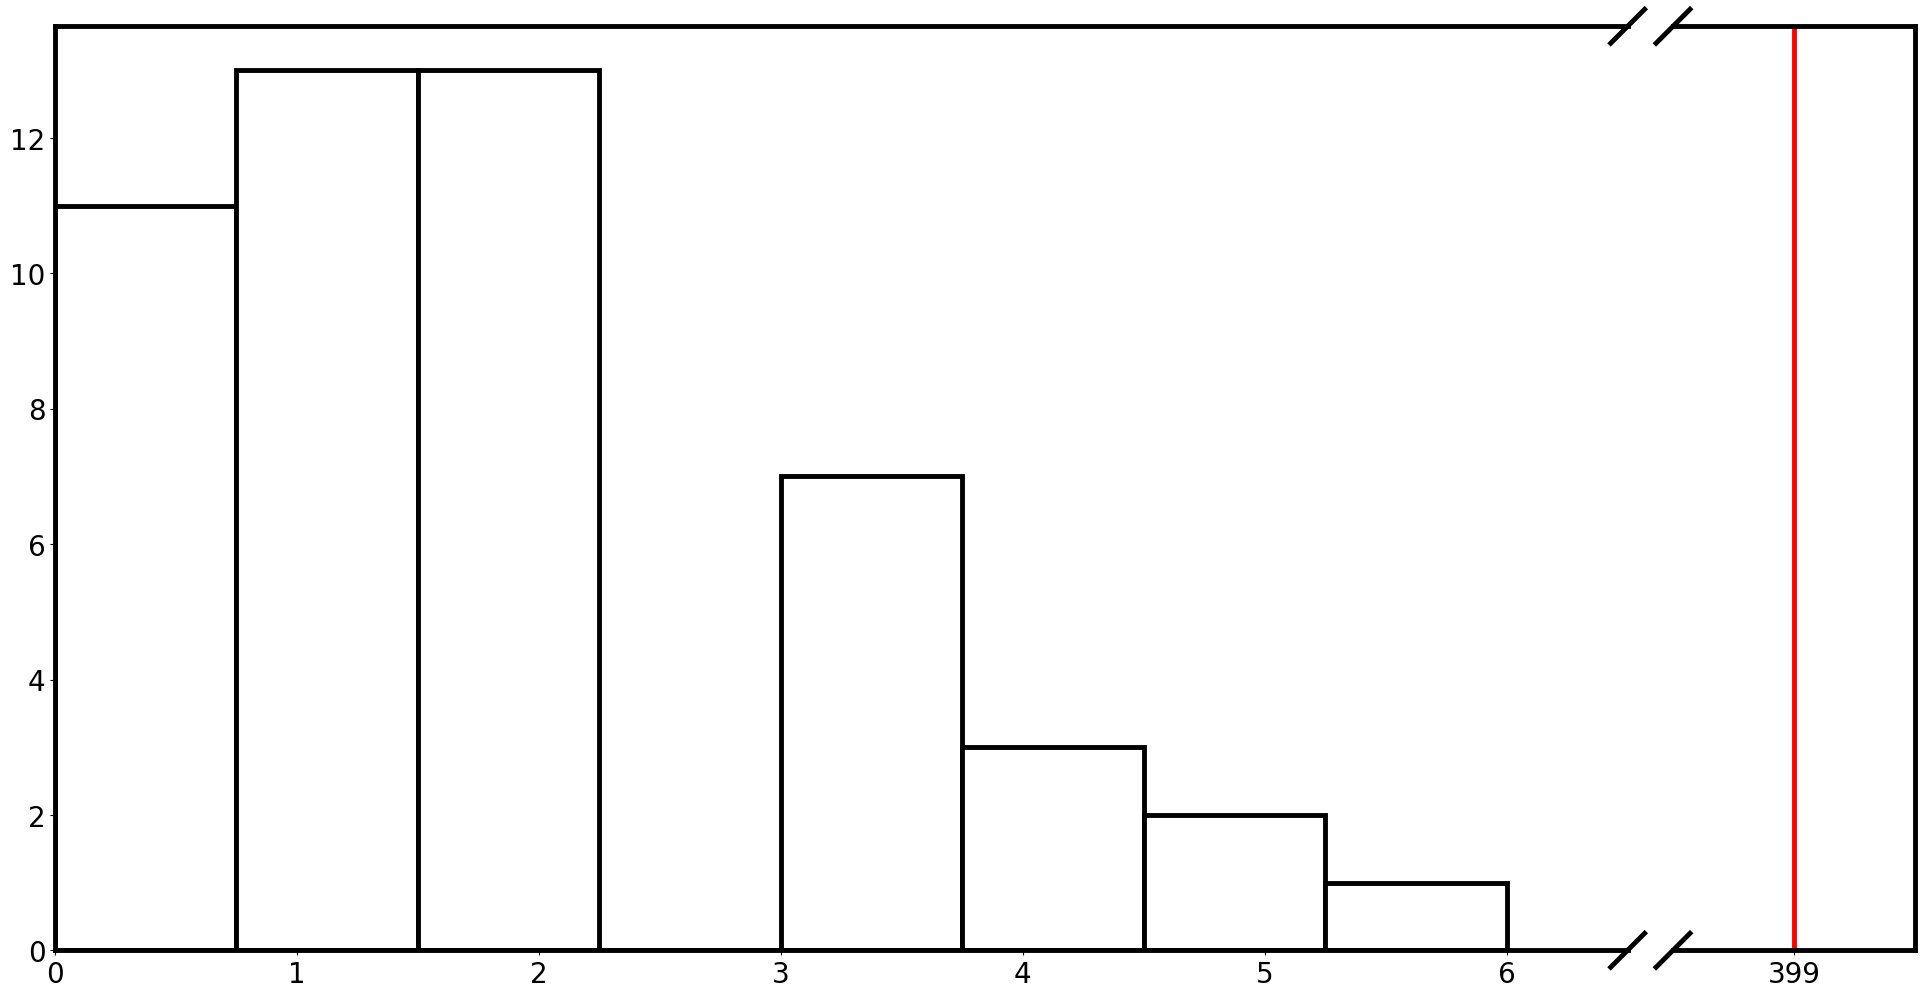

In [46]:
# depict random result picture: transposon similar
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from brokenaxes import brokenaxes

exp_result = 399
control_min = min(random_transposon_similar_EPI_num_list)
control_max = max(random_transposon_similar_EPI_num_list)

fig = plt.figure(figsize=(24,12), linewidth=10)

ax = brokenaxes(xlims=((control_min, control_max+0.5), (exp_result-0.5, exp_result+0.5)),despine=False, wspace=0.05,d=0.01)

plt.rc('axes', linewidth=3.5)
plt.rcParams['font.size'] = 20  # 14pt font size  


ax.hist(random_transposon_similar_EPI_num_list, bins=8, edgecolor='black', color='white', linewidth=3.5)
ax.axvline(x=exp_result, color='red', linewidth=3.5)